In [11]:
#imports
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from scipy.ndimage.filters import gaussian_filter1d
import sqlite3 as sql
import os
import pandas as pd
from datetime import datetime
from glob import glob
import PlaceCellAnalysis as pc

os.sys.path.append('../')
import utilities as u
import preprocessing as pp


%load_ext autoreload
%autoreload 2

%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [129]:
# load session
mouse = '4139212.4'
df = pp.load_session_db()


#df = df[df['RewardCount']>30]
df = df[df['Imaging']==1]
df = df.sort_values(['MouseName','DateTime','SessionNumber'])

df_mouse = df[df['MouseName'].str.match(mouse)]
df_mouse = df_mouse[df_mouse['Track'].str.match('TwoTower_noTimeout') | df_mouse['Track'].str.match('TwoTower_Timeout')]
df_mouse


,MouseName,DateFolder,SessionNumber,Track,RewardCount,Imaging,DateTime,data file,scanfile,scanmat
618,4139212.4,08_10_2018,1,TwoTower_noTimeout,67,1,2018-10-08,G:\My Drive\\VR_Data\TwoTower\4139212.4\08_10_...,G:\My Drive\2P_Data\TwoTower\4139212.4\08_10_2...,G:\My Drive\2P_Data\TwoTower\4139212.4\08_10_2...
620,4139212.4,08_10_2018,3,TwoTower_noTimeout,30,1,2018-10-08,G:\My Drive\\VR_Data\TwoTower\4139212.4\08_10_...,G:\My Drive\2P_Data\TwoTower\4139212.4\08_10_2...,G:\My Drive\2P_Data\TwoTower\4139212.4\08_10_2...
661,4139212.4,10_10_2018,2,TwoTower_noTimeout,70,1,2018-10-10,G:\My Drive\\VR_Data\TwoTower\4139212.4\10_10_...,G:\My Drive\2P_Data\TwoTower\4139212.4\10_10_2...,G:\My Drive\2P_Data\TwoTower\4139212.4\10_10_2...
698,4139212.4,12_10_2018,1,TwoTower_Timeout,36,1,2018-10-12,G:\My Drive\\VR_Data\TwoTower\4139212.4\12_10_...,G:\My Drive\2P_Data\TwoTower\4139212.4\12_10_2...,G:\My Drive\2P_Data\TwoTower\4139212.4\12_10_2...
742,4139212.4,15_10_2018,3,TwoTower_Timeout,36,1,2018-10-15,G:\My Drive\\VR_Data\TwoTower\4139212.4\15_10_...,G:\My Drive\2P_Data\TwoTower\4139212.4\15_10_2...,G:\My Drive\2P_Data\TwoTower\4139212.4\15_10_2...


In [154]:
# load behavior
sess = df_mouse.iloc[4]
VRDat, C, A = pp.load_scan_sess(sess)

 
    

G:\My Drive\2P_Data\TwoTower\4139212.4\15_10_2018\TwoTower_Timeout\TwoTower_Timeout_003_005.mat
19532


C:\Users\mplitt\MightyMorphingPhotonRangers\preprocessing.py:169: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  ca_df['time'] = np.arange(0,1/fr*numCaFrames,1/fr)[:numCaFrames]
C:\Users\mplitt\Anaconda3\lib\site-packages\pandas\core\frame.py:3035: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


G:\My Drive\2P_Data\TwoTower\4139212.4\15_10_2018\TwoTower_Timeout\TwoTower_Timeout_003_005.mat
#subsystem#not made into numpy array


In [155]:
# by trial info and position binned neural data
trial_info, tstart_inds, teleport_inds = u.by_trial_info(VRDat)
C_trial_mat, occ_trial_mat, edges,centers = u.make_pos_bin_trial_matrices(C,VRDat['pos']._values,VRDat['tstart']._values,VRDat['teleport']._values)
C_morph_dict = u.trial_type_dict(C_trial_mat,trial_info['morphs'])
occ_morph_dict = u.trial_type_dict(occ_trial_mat,trial_info['morphs'])

C:\Users\mplitt\MightyMorphingPhotonRangers\utilities.py:186: RuntimeWarning: Mean of empty slice
  zone1_speed[i] = np.nanmean(sub_frame.loc[zone1_mask,'speed'])


In [156]:
print(C_morph_dict[0].shape)

(30, 90, 1382)


dict_keys(['morphs', 'max_pos', 'rewards', 'zone0_licks', 'zone1_licks', 'zone0_speed', 'zone1_speed', 'pcnt', 'wallJitter', 'towerJitter', 'bckgndJitter', 'clickOn', 'pos_lick'])


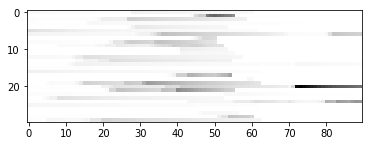

In [157]:
f,ax = plt.subplots()
ax.imshow(C_morph_dict[1][:,:,0],cmap='Greys')
print(trial_info.keys())

In [158]:
masks, FR, SI = pc.place_cells_split_halves(C, VRDat['pos']._values,trial_info, VRDat['tstart']._values, VRDat['teleport']._values)

C:\Users\mplitt\MightyMorphingPhotonRangers\PlaceCellAnalysis.py:173: RuntimeWarning: divide by zero encountered in log2
  si+= occupancy[c]*p_map[c]*np.log2(p_map[c]/denom)
C:\Users\mplitt\MightyMorphingPhotonRangers\PlaceCellAnalysis.py:173: RuntimeWarning: invalid value encountered in double_scalars
  si+= occupancy[c]*p_map[c]*np.log2(p_map[c]/denom)
C:\Users\mplitt\MightyMorphingPhotonRangers\PlaceCellAnalysis.py:248: RuntimeWarning: invalid value encountered in greater
  p[cell] = np.sum(SI[cell]>shuffled_SI[:,cell])/nperms


In [159]:
# statistics of place cells

# number in each environment
print('morph 0 place cells = %g out of %g , %f ' % (masks[0].sum(), masks[0].shape[0], masks[0].sum()/masks[0].shape[0]))
print('morph 1 place cells = %g out of %g, %f' % (masks[1].sum(), masks[1].shape[0], masks[1].sum()/masks[1].shape[0]))


# number with place fields in both
common_pc = np.multiply(masks[0],masks[1])
print('common place cells = %g' % common_pc.sum())
    # including, excluding reward zones

print(FR[0]['all'].shape)
FR_0_cpc = FR[0]['all'][:,common_pc]
FR_1_cpc = FR[1]['all'][:,common_pc]





morph 0 place cells = 910 out of 1382 , 0.658466 
morph 1 place cells = 892 out of 1382, 0.645441
common place cells = 588
(90, 1382)


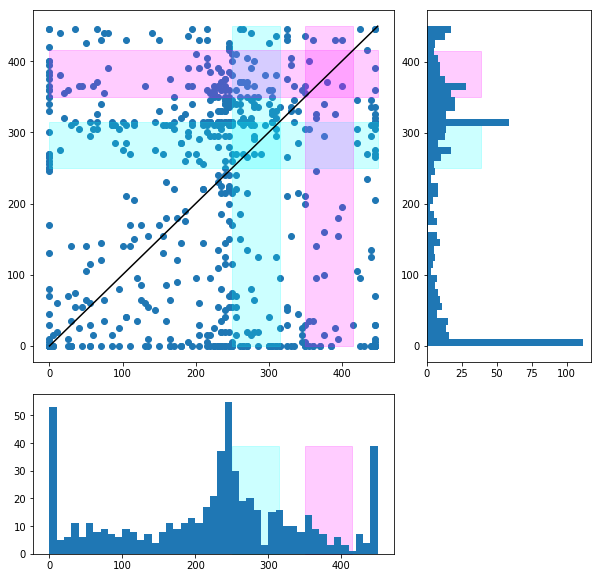

In [160]:
import matplotlib.gridspec as gridspec
f = plt.figure(figsize=[10,10])
gs = gridspec.GridSpec(3,3)
ax = f.add_subplot(gs[0:-1,0:-1])


#f,ax = plt.subplots()
ax.scatter(5.*np.argmax(FR_0_cpc,axis=0),5*np.argmax(FR_1_cpc,axis=0))
ax.plot(np.arange(450),np.arange(450),color='black')
ax.fill_between(np.arange(450),250,y2=315,color=plt.cm.cool(0),alpha=.2)
ax.fill_betweenx(np.arange(450),250,x2=315,color=plt.cm.cool(0),alpha=.2)
ax.fill_between(np.arange(450),350,y2=415,color=plt.cm.cool(1.),alpha=.2)
ax.fill_betweenx(np.arange(450),350,x2=415,color=plt.cm.cool(1.),alpha=.2)

ax1 = f.add_subplot(gs[-1,0:-1])
ax1.hist(5.*np.argmax(FR_0_cpc,axis=0),np.arange(0,460,10))
ax1.fill_betweenx(np.arange(40),250,x2=315,color=plt.cm.cool(0),alpha=.2)
ax1.fill_betweenx(np.arange(40),350,x2=415,color=plt.cm.cool(1.),alpha=.2)

ax2 = f.add_subplot(gs[0:-1,-1])
ax2.hist(5.*np.argmax(FR_1_cpc,axis=0),np.arange(0,460,10),orientation='horizontal')
ax2.fill_between(np.arange(40),250,y2=315,color=plt.cm.cool(0),alpha=.2)
ax2.fill_between(np.arange(40),350,y2=415,color=plt.cm.cool(1.),alpha=.2)

# reward zone cells

# place field shift distribution

(1382,) (910,)


(<matplotlib.figure.Figure at 0x20889ed84a8>,
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020889E40278>,
       dtype=object))

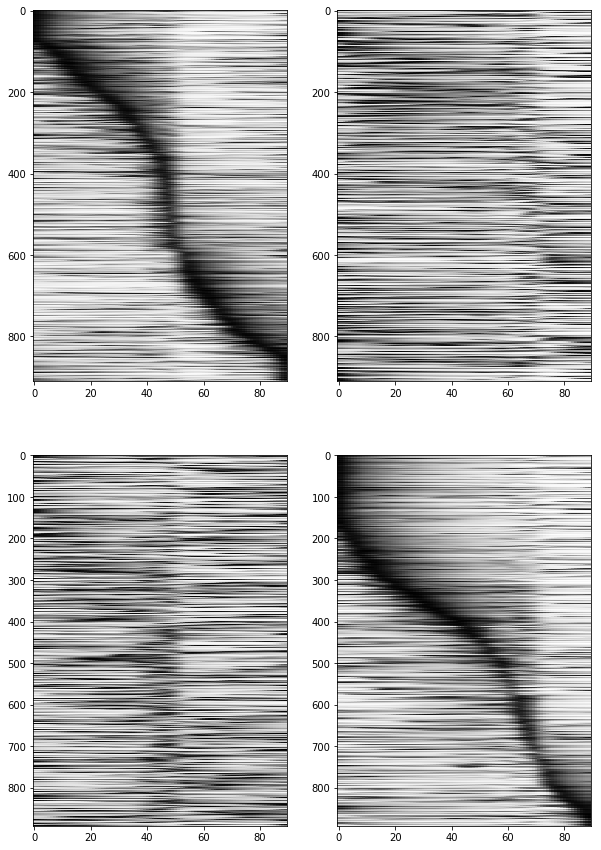

In [161]:
pc.plot_placecells(C_morph_dict,masks)

# physical location of place cells

In [208]:
# define coloring scheme
ca_dat = pp.load_ca_mat(sess['scanfile'])



#subsystem#not made into numpy array


In [210]:
print(ca_dat['A_keep'].shape)
masks[0].shape

(407552, 1637)


(1637,)

In [321]:
# place cell in one environment v both
#A = np.ceil(ca_dat['A_keep'])
 


# location of firing field

# reward selectivity

# LDA projection weights

In [322]:
nz = ca_dat['A_keep'].nonzero()
A= np.zeros(ca_dat['A_keep'].shape)


A[nz]=1
A[:,none]=0
A[:,both]*=.01
A[:,m0]*=-1
#A[:,m1]*=1

#A_m = np.ma.array(A)
A_m = np.ma.array(A.max(axis=1) + A.min(axis=1))
A_m[A_m==0]=np.nan

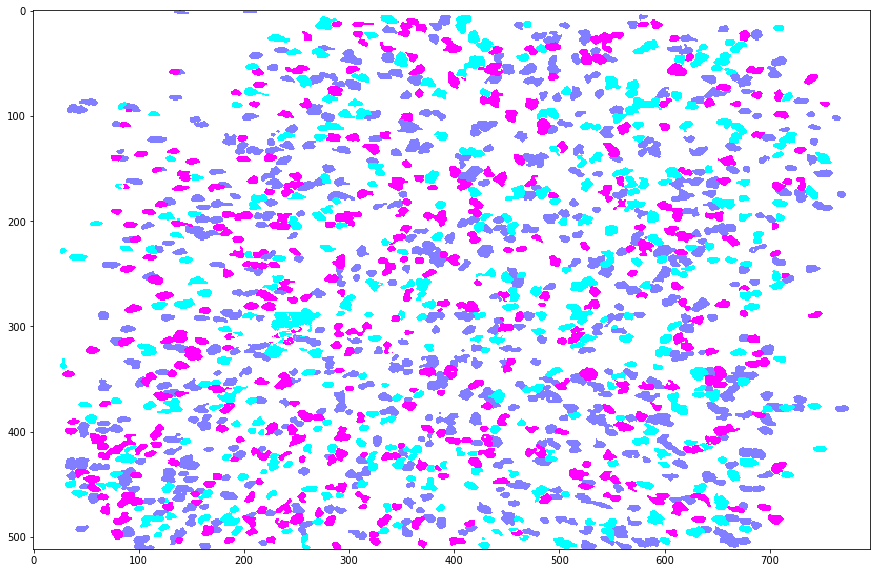

In [324]:

f, ax = plt.subplots(figsize=[15,15])
ax.imshow(np.reshape(A_m,[512,796],order='F'),cmap='cool',vmin=-1,vmax=1)

In [350]:
# reward cells
bin_edges = np.arange(5,455,5)
rzone0 = slice(45,65,1)
rzone1 = slice(65,5,1)

rscore = np.divide(FR[0]['all'][rzone0,:].sum(axis=0) + FR[1]['all'][rzone1,:].sum(axis=0),FR[0]['all'].sum(axis=0) + FR[1]['all'].sum(axis=0))
print(rscore.shape)


(1637,)


In [354]:
A= np.zeros(ca_dat['A_keep'].shape)
A[nz]=1
print(A.shape)
for i,s in enumerate(rscore.tolist()):
    A[:,i]*=s


(407552, 1637)


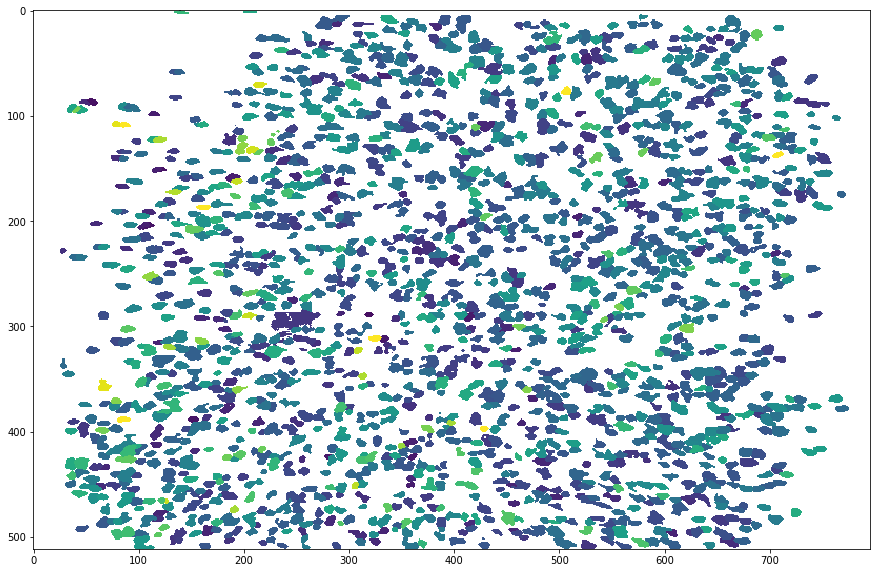

In [359]:
A_m = np.ma.array(A.max(axis=1) + A.min(axis=1))
A_m[A_m==0]=np.nan
f, ax = plt.subplots(figsize=[15,15])
ax.imshow(np.reshape(A_m,[512,796],order='F'),vmin=0,vmax=.3)

In [369]:
trial_mat = C_morph_dict[0]
half = int(trial_mat.shape[0]/2)

fr0 = np.squeeze(np.nanmean(trial_mat[:half,:,:],axis=0))
fr1 = np.squeeze(np.nanmean(trial_mat[half:,:,:],axis=0))

sc_corr = np.array([sp.stats.pearsonr(fr0[:,cell],fr1[:,cell]) for cell in range(fr0.shape[1])])
pv_corr = np.array([sp.stats.pearsonr(fr0[pos,:],fr1[pos,:]) for pos in range(fr0.shape[0])])

(1637, 2)


(array([ 31.,  78., 143., 172., 201., 224., 231., 241., 215., 101.]),
 array([-0.78435539, -0.60604513, -0.42773487, -0.24942461, -0.07111435,
         0.10719591,  0.28550617,  0.46381643,  0.64212669,  0.82043695,
         0.99874721]),
 <a list of 10 Patch objects>)

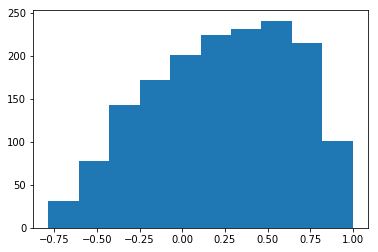

In [367]:
print(prsnr.shape)
f,ax = plt.subplots()
ax.hist(prsnr[:,0])